In [1]:
from data_loader import *
from index_trend import *
from strategy import *
from trading import *

In [2]:
df = pd.read_csv('./Dataset/stock_minute.csv')
df = df.drop(df.columns[0], axis = 1 )

In [3]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Ticker,TickerName
0,2022-10-05 09:30:00-04:00,1.7201,1.7201,1.7201,1.7201,1.7201,3187.0,AACG,ATA Creativity Global American Depositary Shares
1,2022-10-05 11:37:00-04:00,1.8450,1.8500,1.8400,1.8400,1.8400,501.0,AACG,ATA Creativity Global American Depositary Shares
2,2022-10-05 11:55:00-04:00,1.8350,1.8350,1.8350,1.8350,1.8350,301.0,AACG,ATA Creativity Global American Depositary Shares
3,2022-10-05 12:08:00-04:00,1.8475,1.8475,1.8475,1.8475,1.8475,201.0,AACG,ATA Creativity Global American Depositary Shares
4,2022-10-05 12:42:00-04:00,1.8300,1.8300,1.8300,1.8300,1.8300,151.0,AACG,ATA Creativity Global American Depositary Shares
...,...,...,...,...,...,...,...,...,...
4698090,2022-10-17 10:51:00-04:00,8.9400,8.9400,8.9000,8.9000,8.9000,1590.0,ZYXI,Zynex Inc. Common Stock
4698091,2022-10-17 10:52:00-04:00,8.8900,8.9300,8.8800,8.8950,8.8950,9911.0,ZYXI,Zynex Inc. Common Stock
4698092,2022-10-17 10:53:00-04:00,8.9500,8.9500,8.9100,8.9100,8.9100,807.0,ZYXI,Zynex Inc. Common Stock
4698093,2022-10-17 10:58:00-04:00,8.9473,8.9473,8.9473,8.9473,8.9473,724.0,ZYXI,Zynex Inc. Common Stock


In [4]:
df['Datetime'] = to_datetime(df['Datetime'])

In [5]:
goog_df = df.groupby('Ticker').get_group('GOOG')

In [6]:
bt = backtester(goog_df, 30000, 0)

In [7]:
index_df = bt.get_strategy( a = 1/28, w=1)

In [8]:
index_df = bt.trading_signal(index_df, up = 70, down = 30)

In [9]:
index_df

,Datetime,Ticker,RSI,Adj Close,signal
1043725,2022-10-05 09:30:00,GOOG,NaN,100.864998,0
1043726,2022-10-05 09:31:00,GOOG,0.000000,100.830002,1
1043727,2022-10-05 09:32:00,GOOG,78.634236,100.954201,-1
1043728,2022-10-05 09:33:00,GOOG,91.393644,101.180000,-1
1043729,2022-10-05 09:34:00,GOOG,92.779845,101.250000,-1
...,...,...,...,...,...
3488168,2022-10-17 10:55:00,GOOG,47.052624,100.860001,0
3488169,2022-10-17 10:56:00,GOOG,45.575953,100.790001,0
3488170,2022-10-17 10:57:00,GOOG,46.569654,100.830002,0
3488171,2022-10-17 10:59:00,GOOG,49.666911,100.959999,0


In [10]:
back_test = bt.back_trading_result(index_df)

(array([19270., 19272., 19274., 19276., 19278., 19280., 19282.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

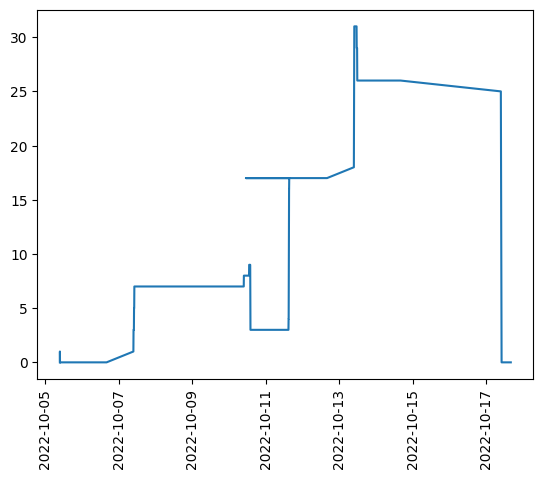

In [23]:
import matplotlib.pyplot as plt
plt.plot(back_test['Datetime'],back_test['stock'])
plt.xticks(rotation=90)